(68, 533, 175, 426)


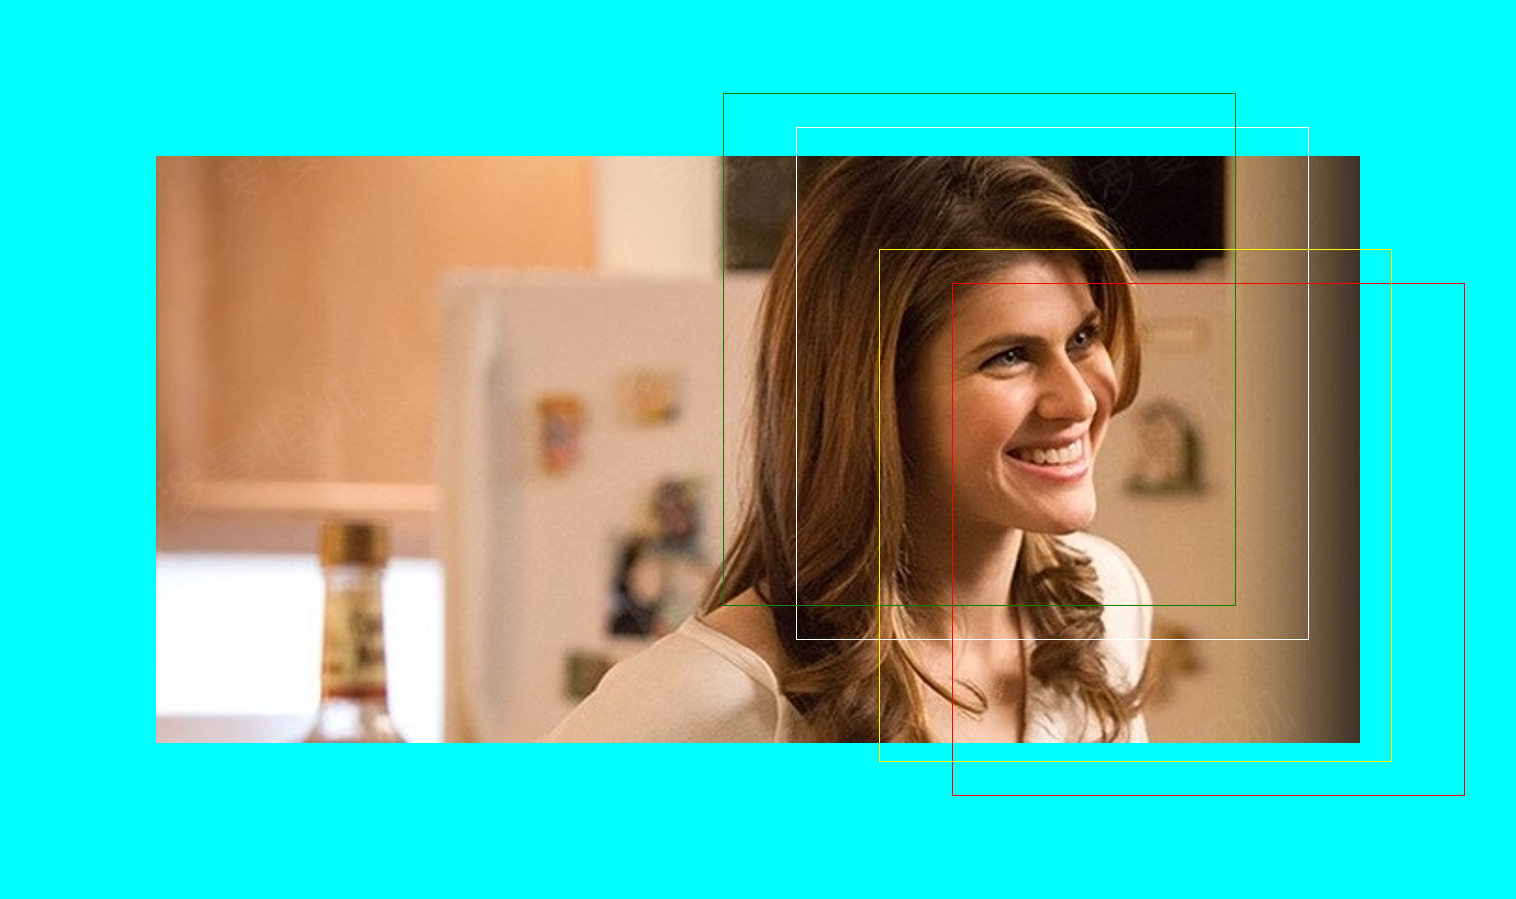

rec_length=107, resize_ratio=1.8691588785046729, margin_length=156


In [14]:
import io
import face_recognition
from IPython.display import display
from PIL import Image, ImageDraw, ImageOps
import numpy


def process_image(img, face_location, margin_ratio, sample_length, output_uri=None):
    # todo: 裁剪 + 上传 + 图片合格判断
    err_msg = None
    x, y = face_location[3], face_location[0]
    rec_length = face_location[2] - face_location[0]

    with Image.open(io.BytesIO(img)) as image:
        image = ImageOps.exif_transpose(image)
        #  image.show()
        white = (0, 255, 255)
        #  图像重新缩放, 识别的面部区域增加了margin之后, 边长缩放到sample_length的对应比例
        resize_ratio = sample_length / (rec_length * (1 + margin_ratio))
        #  原图进行缩放
        image = image.resize((round(image.size[0] * resize_ratio), round(image.size[1] * resize_ratio)))
        #  计算上下左右单边的扩展边长度
        margin_length = round(sample_length * margin_ratio / (1 + margin_ratio) / 2)
        #  创建一个包含扩展边长度的底板
        margin_image = Image.new('RGB', (image.size[0] + margin_length * 2, image.size[1] + margin_length * 2), white)
        #  将缩放后的原图, 粘贴到含扩展边底板的中间, 在裁剪靠近边缘时, 会截取到扩展边的白色区域
        margin_image.paste(image,
                           (0 + margin_length, 0 + margin_length, image.size[0] + margin_length,
                            image.size[1] + margin_length))
        # margin_image.show()
        # 计算缩放后原图中, 识别出的脸部位置坐标
        resized_x = round(x * resize_ratio)
        resized_y = round(y * resize_ratio)
        # 裁剪出sample_length长度的方形脸部区域
        # cropped_image = margin_image.crop((resized_x, resized_y, resized_x + sample_length, resized_y + sample_length))
        # cropped_image.show()
        # cropped_image.save(output_path)
        # if output_uri:
        #     upload(cropped_image, output_uri)
        # return err_msg, np.array(cropped_image)
        draw = ImageDraw.Draw(margin_image)
        draw.rectangle((resized_x, resized_y, resized_x + sample_length, resized_y + sample_length))
        # draw.rectangle((resized_x + margin_length, resized_y + margin_length, resized_x + sample_length + margin_length, resized_y + sample_length + margin_length), outline='red')
        (50, 528, 192, 387)
        left = int(387 * resize_ratio)
        top = int(50 * resize_ratio)
        draw.rectangle((left, top, left + sample_length, top + sample_length), outline='green')
        # draw.rectangle((left + margin_length, top + margin_length, left + sample_length + margin_length, top + sample_length + margin_length), outline='yellow')
        left = int((387 + margin_length) * resize_ratio)
        top = int((50 + margin_length) * resize_ratio)
        draw.rectangle((left, top, left + sample_length, top + sample_length), outline='orange')
        display(margin_image)
    print(f'{rec_length=}, {resize_ratio=}, {margin_length=}')


def face():
    image = Image.open('/Users/chensg/Downloads/ef6e7dfa-fbdf-4254-b2c0-9855dce37634.jpg')
    print(f'{image.size=}')
    # image = ImageOps.exif_transpose(image)
    # display(image)
    locs = face_recognition.face_locations(numpy.array(image))
    print(f'{locs=}')
    
    draw = ImageDraw.Draw(image)

    for (top, right, bottom, left) in locs:
        draw.rectangle((left, top, right, bottom), outline=(255, 0, 0))
    for (top, right, bottom, left) in [(50, 528, 192, 387)]:
        draw.rectangle((left, top, right, bottom), outline=(0, 255, 0))
    del draw
    display(image)

def main():
    with open('/Users/chensg/Downloads/d698f3c3-0dcc-4e0d-8dd9-d4be87dbea8c.jpg', 'rb') as f:
        img = f.read()
        image = Image.open(io.BytesIO(img))
        locs = face_recognition.face_locations(numpy.array(image))
        print(locs[0])
        process_image(img, locs[0], 1.56, 512)

main()